In [153]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline

import tensorflow as tf
from keras.preprocessing.image import load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input

In [154]:
BASE_DIR = 'dataset/'

In [155]:
image_paths = []
age_labels = []
gender_labels = []

for filename in tqdm(os.listdir(BASE_DIR)):
    image_path = os.path.join(BASE_DIR, filename)
    temp = filename.split('_')
    age = int(temp[0])
    gender = int(temp[1])
    image_paths.append(image_path)
    age_labels.append(age)
    gender_labels.append(gender)
    

ImportError: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

In [ ]:
df = pd.DataFrame()
df['image'],df['age'],df['gender'] = image_paths,age_labels,gender_labels
df.head()

In [ ]:
gender_dict ={0:'Male', 1:'Female'}

In [ ]:
from PIL import Image
img = Image.open(df['image'][0])
plt.axis('off')
plt.imshow(img);

KeyError: 0

Exception ignored in: <function tqdm.__del__ at 0x00000203ED290670>
Traceback (most recent call last):
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\std.py", line 1149, in __del__
    self.close()
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\notebook.py", line 278, in close
    self.disp(bar_style='danger', check_delay=False)
AttributeError: 'tqdm_notebook' object has no attribute 'disp'
Exception ignored in: <function tqdm.__del__ at 0x00000203ED290670>
Traceback (most recent call last):
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\std.py", line 1149, in __del__
    self.close()
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\notebook.py", line 278, in close
    self.disp(bar_style='danger', check_delay=False)
AttributeError: 'tqdm_notebook' object has no attribute 'disp'
Exception ignored in: <function tqdm.__del__ at 0x000002

<Axes: xlabel='age'>

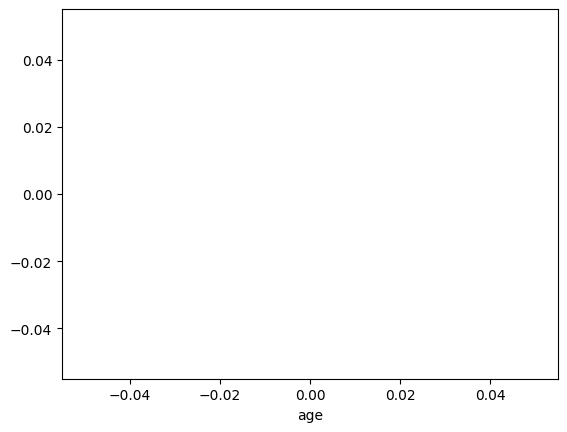

In [ ]:
sns.distplot(df['age'])

<Axes: >

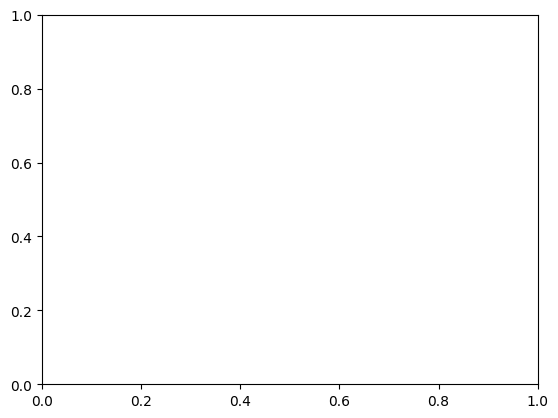

In [ ]:
sns.countplot(df['gender'])

In [ ]:
plt.figure(figsize=(20,20))
files = df.iloc[0:25]

for index,file,age,gender in files.itertuples():
    plt.subplot(5,5,index+1)
    img=load_img(file)
    img=np.array(img)
    plt.imshow(img)
    plt.title(f"Age: {age} Gender: {gender_dict[gender]}")
    plt.axis('off')

<Figure size 2000x2000 with 0 Axes>

In [ ]:
def extract_features(images):
    features = []
    for images in  tqdm(images):
        img = load_img(image, grayscale=True)
        img=img.resize((128,128),Image.ANTIALIAS)
        img=np.array(img)
        features = np.array(img)
    
    features = np.array(features)
    features = features.reshape(len(features),128,128,10)
    return features

In [ ]:
X= extract_features(df['image'])

In [ ]:
X.shape

In [ ]:
x=X/255.0

In [ ]:
y_gender = np.array(df['gender'])
y_age = np.array(df['age'])

In [ ]:
input_shape = (128,128,1)

In [ ]:
inputs = Input((input_shape))
conv_1 = Conv2D(32,kernel_size=(3,3),activation='relu')(inputs)
maxp_1 = MaxPooling2D(pool_size=(2,2))(conv_1)
conv_1 = Conv2D(64,kernel_size=(3,3),activation='relu')(maxp_1)
maxp_2 = MaxPooling2D(pool_size=(2,2))(conv_2)
conv_1 = Conv2D(128,kernel_size=(3,3),activation='relu')(maxp_2)
maxp_3 = MaxPooling2D(pool_size=(2,2))(conv_3)
conv_1 = Conv2D(256,kernel_size=(3,3),activation='relu')(maxp_3)
maxp = MaxPooling2D(pool_size=(2,2))(conv_4)

flatten = Flatten() (max_4)

dense_1 = Dense(256, activation='relu')(flatten)
dense_2 = Dense(256, activation='relu')(flatten)

dropout_1 = Dropout(0.3)(dense_1)
dropout_2 = Dropout(0.3)(dense_2)

output_1 = Dense(1, activation='sigmoid' , name='gander_out')(dropout_1)
output_2 = Dense(1,activation='relu',name='age_out')(dropout_2)

model =Model(input=[inputs], output=[output_1,output_2])

model.compile(loss=['binary_crossentropy','mae'], optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
 from tensorflow.keras.utils import plot_model
plot_model(model)

In [ ]:
history =model.fit(x=X,y=[y_gender, y_age], batch_size=32, epochs=30, validation_split=0.2)

In [ ]:
acc = history.history['gender_out_accuracy']
val_acc = history.history['val_gender_out_accuracy']
epochs =range(len(acc))

plt.plot(epochs,acc,'b',label='Training Accuracy')
plt.plot(epochs,val_acc,'r',label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['gender_out_loss']
val_loss=history.history['val_gender_out_loss']

plt.plot(epochs, loss, 'b', lable='Training Loss')
plt.plot(epochs, val_loss, 'r', lable='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

In [ ]:
acc = history.history['age_out_accuracy']
val_acc = history.history['val_age_out_accuracy']
epochs =range(len(loss))


plt.plot(epochs, loss, 'b', lable='Training Loss')
plt.plot(epochs, val_loss, 'r', lable='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

In [ ]:
image_index = 100
print('Orignal Gender:',gender_dict[y_gender[image_index]], 'Orignal Age:', y_age[image_index])
pred = model.predict(X[image_index].reshape(1,128,128,1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender :", pred_gender, "Predicted Age :", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128,128),camp='gray')

In [ ]:
image_index = 200
print('Orignal Gender:',gender_dict[y_gender[image_index]], 'Orignal Age:', y_age[image_index])
pred = model.predict(X[image_index].reshape(1,128,128,1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender :", pred_gender, "Predicted Age :", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128,128),camp='gray')

In [ ]:
image_index = 250
print('Orignal Gender:',gender_dict[y_gender[image_index]], 'Orignal Age:', y_age[image_index])
pred = model.predict(X[image_index].reshape(1,128,128,1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender :", pred_gender, "Predicted Age :", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128,128),camp='gray')